# ML Project

# Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Placement_Data.csv')

**Check the first four rows of the dataframe**

In [3]:
df.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed

14.salary : Salary if the student is placed

**Get all feature names**

In [4]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

**Find the number of records and columns**

In [5]:
df.shape

(215, 15)

**Use the .info() method to find the number of Non Null entries and Data Type of each feature**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**What is the average Secondary Education percentage - 10th Grade**

In [7]:

df['ssc_p'].mean()

67.30339534883721

**What is the max Secondary Education percentage - 10th Grade**

In [8]:
df['ssc_p'].max()

89.4

**How many toppers where there in 10th Grade?**


In [9]:
df[df['ssc_p']==df['ssc_p'].max()].shape[0]

1

**Is the student who got highest Secondary Eduaction percentage, placed or not?**


In [10]:
df[df['ssc_p']==df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object


**How many students are placed or unplaced?**

In [11]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [12]:
148/215

0.6883720930232559

**What is the most common degree of the placed students?**

In [13]:
df[df['status']=='Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64


**How many unique degrees are there in the dataset?**

In [14]:
df['degree_t'].nunique()

3

**Is there a correlation between 10th and 12th percentage**

In [15]:
df[['ssc_p','hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


**Find the correlation matrix**?


In [16]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


# Data Pre-processing

**Identify the column which can be removed?(only 1)**

**Remove the unnecessary column**

In [17]:
df.drop(columns=['sl_no'], inplace=True)

In [18]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.

**Check number of null values in each column**

In [19]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Fill the missing values with appropriate values and check number of null values in each column again**

In [20]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [21]:
df.groupby(['status'])['salary'].count()

status
Not Placed      0
Placed        148
Name: salary, dtype: int64

In [22]:
df.fillna(0, inplace=True)

In [23]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Visualization



**Import matplotlib and seaborn**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

**Draw a scatter plot between 10th and 12th percentage with labels and title**

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

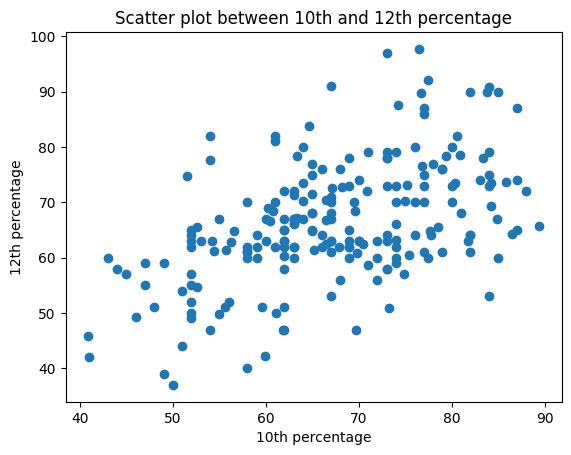

In [25]:
plt.scatter(df['ssc_p'],df['hsc_p'])
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title("Scatter plot between 10th and 12th percentage")

**Draw the scatter plot between 10th and 12th class percentage of students grouped based on placement data**

In [26]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
df['status'].map(colors)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

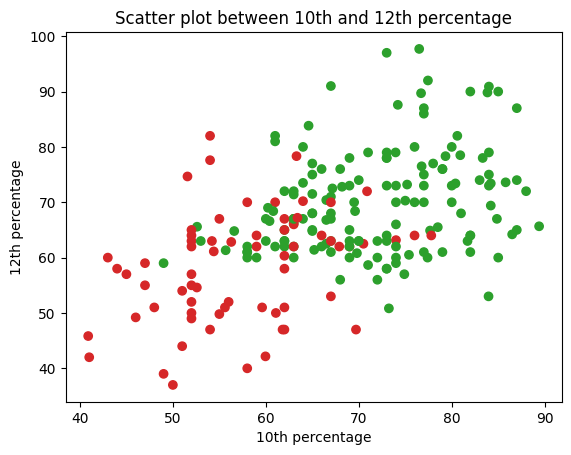

In [27]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
plt.scatter(df['ssc_p'],df['hsc_p'],c=df['status'].map(colors))
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title("Scatter plot between 10th and 12th percentage")

**Draw the pairplots between all continuous columns**

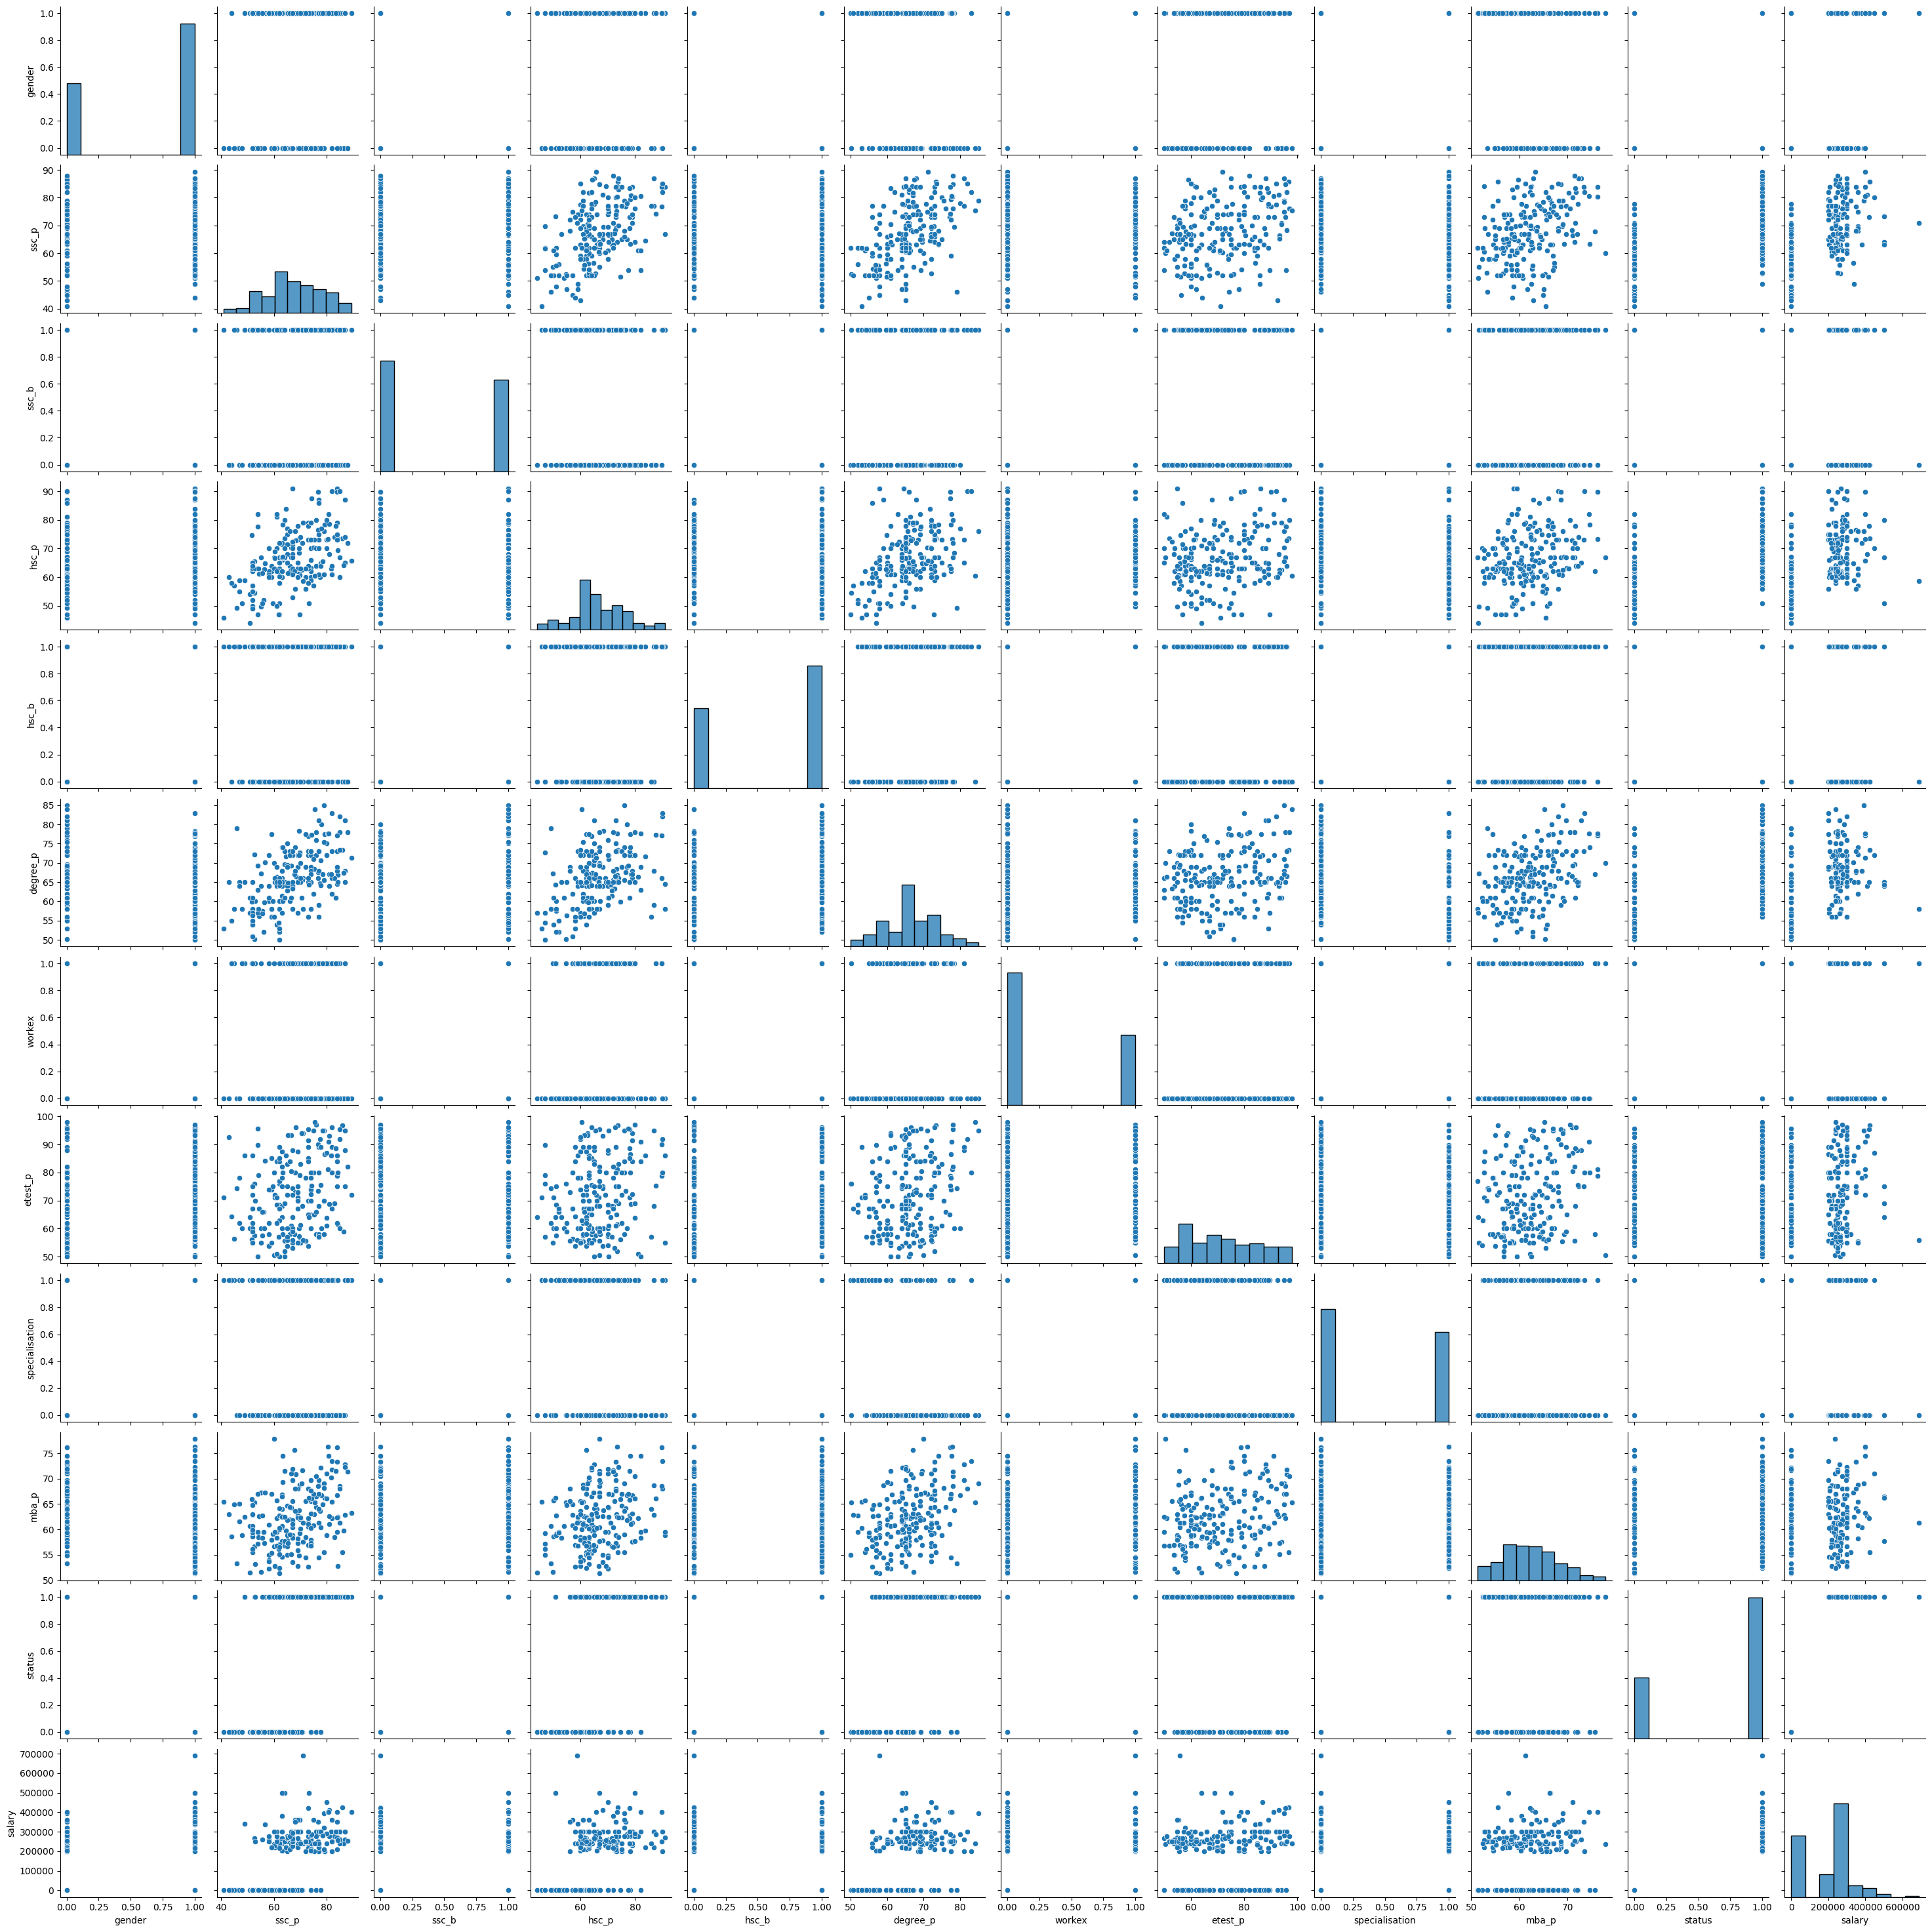

In [140]:
sns.pairplot(df)

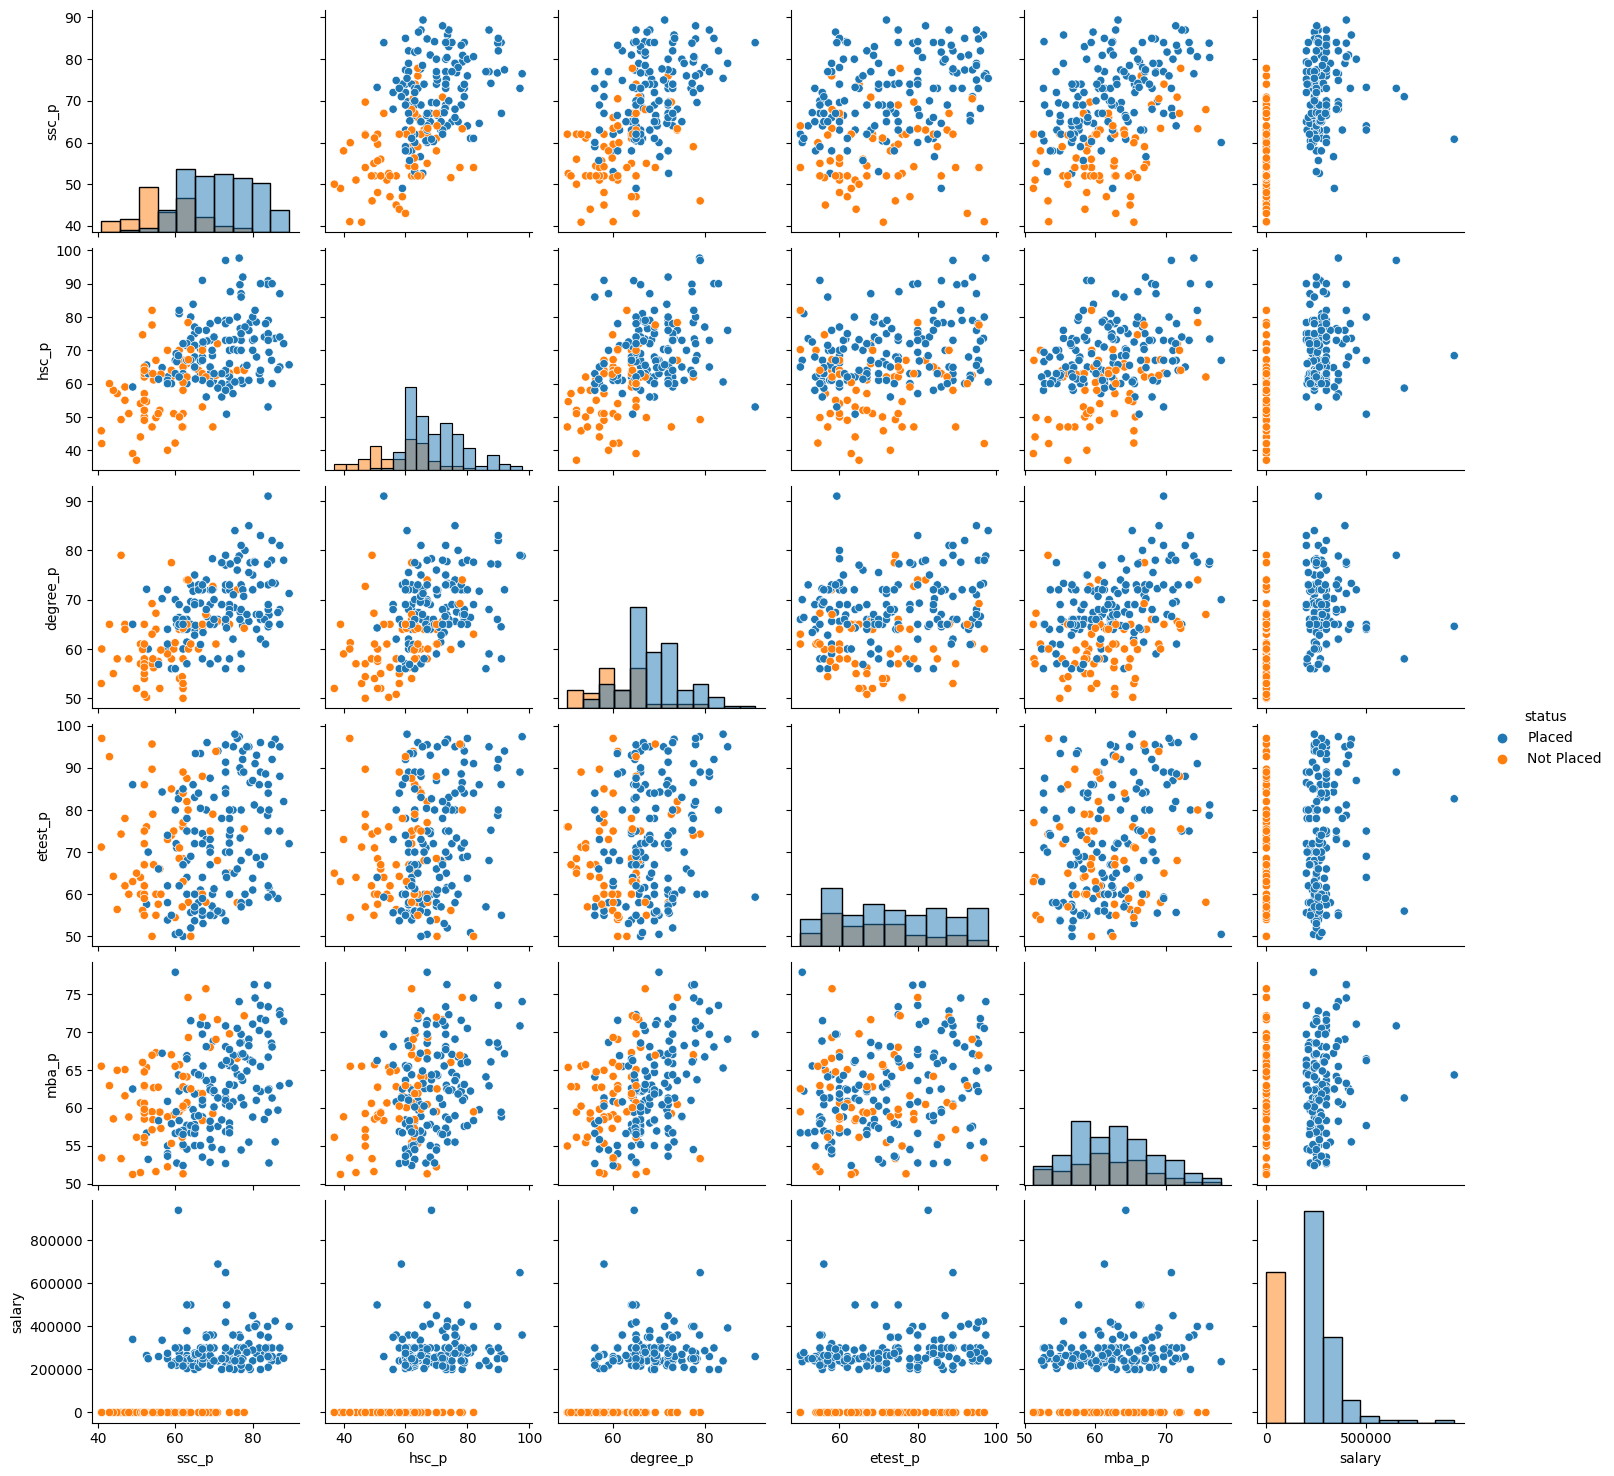

In [29]:
sns.pairplot(df,hue='status', diag_kind='hist')

**Draw a boxplot for 10th percentage of the students**

<AxesSubplot:ylabel='ssc_p'>

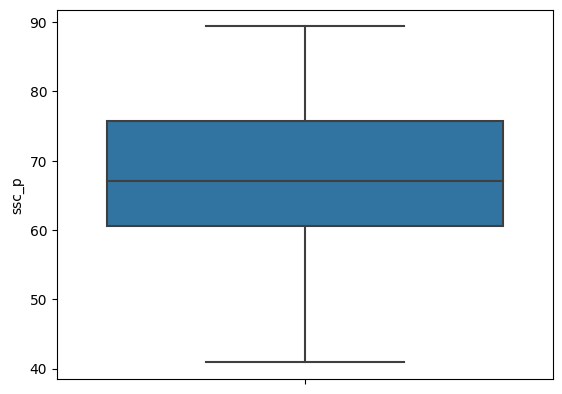

In [30]:
sns.boxplot(y='ssc_p', data=df)

**Draw a boxplot for 12th percentage of the students**

<AxesSubplot:ylabel='hsc_p'>

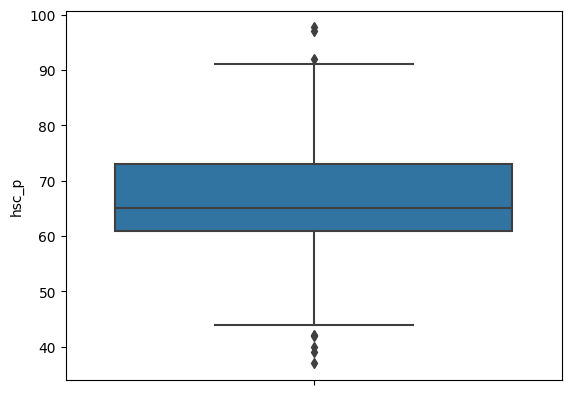

In [31]:
sns.boxplot(y='hsc_p',data=df)

**Draw a boxplot for 12th percentage of the students for placed and unplaced students**

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

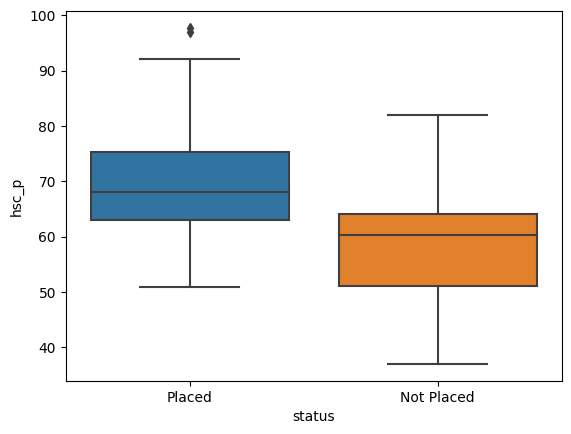

In [32]:
sns.boxplot(y='hsc_p',data=df, x='status')

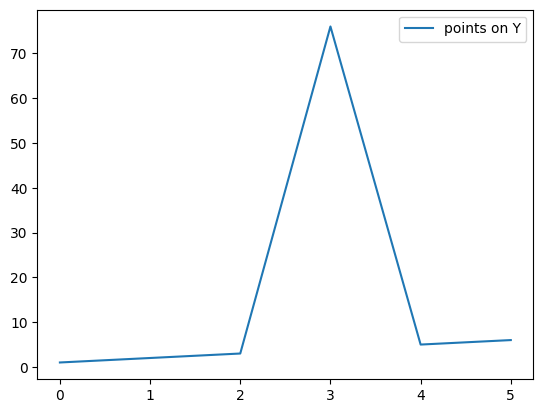

In [33]:
y=[1,2,3,76,5,6]
plt.plot(y,label="points on Y")
plt.legend()

**Draw lineplot for 10th, 12th, degree and MBA percentage**

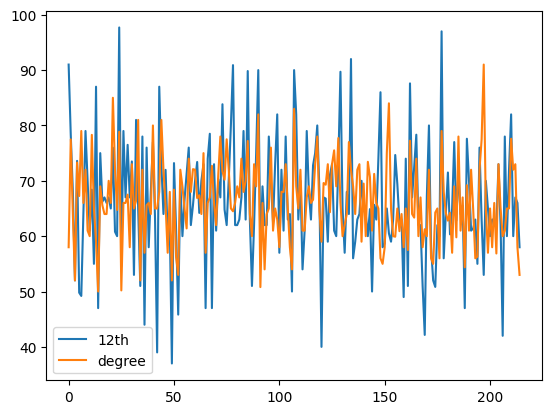

In [34]:

plt.plot(df['hsc_p'], label="12th")
plt.plot(df['degree_p'], label="degree")
plt.legend()

**Find correlation between continous columns**

In [35]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


**Draw heatmap of correlation**

heatmap visualization or heatmap data visualization is a method of graphically representing numerical data where the value of each data point is indicated using colors.

<AxesSubplot:>

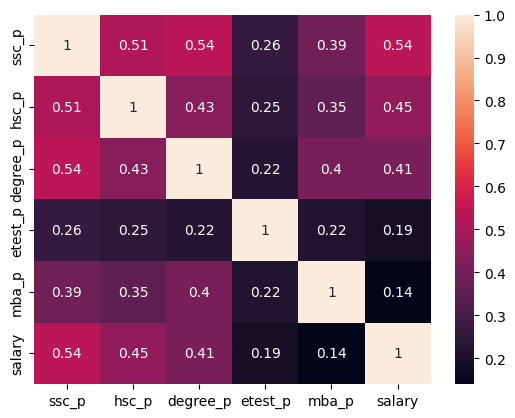

In [36]:
sns.heatmap(df.corr(), annot=True)

**Draw histogram for salary of students**

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <BarContainer object of 10 artists>)

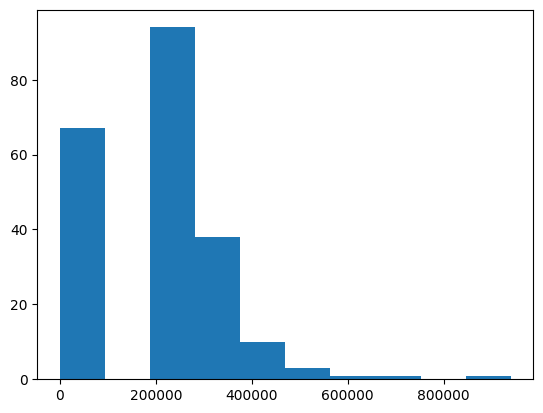

In [37]:
plt.hist(df['salary'])

**Draw the distribution of 10th Grade percentage**

<AxesSubplot:xlabel='ssc_p', ylabel='Density'>

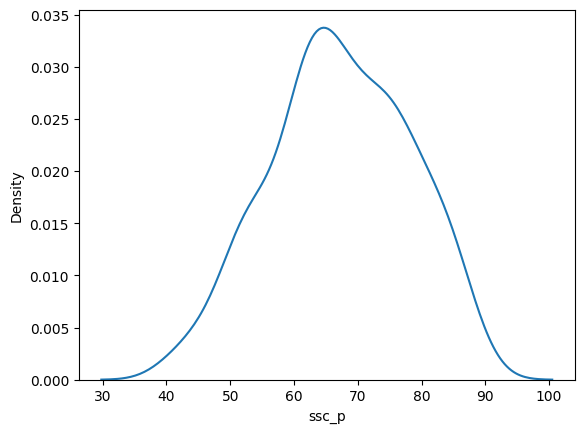

In [38]:
sns.kdeplot(df['ssc_p'])

In [39]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

# Outlier Analysis

In [40]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [42]:
# Removing outlier using IQR
def remove_outlier(col,x=df):

  # 1. Compute Quantiles
  q1 = np.quantile(df[col], .25)
  q3 = np.quantile(df[col], .75)

  IQR = q3 - q1

  # 2. Compute the upper & lower limit
  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  return df[(df[col] < upper_limit) & (df[col] > lower_limit)]

In [43]:
#chaching catorigical varival
categorical_columns = df.select_dtypes('O').columns
numeric_columns = [cols for cols in df.columns if cols not in categorical_columns]

In [44]:
numeric_columns

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [45]:
for i in numeric_columns:
    data =remove_outlier(i,df)
    df=data

In [46]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [47]:
data.describe(include='object')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,205,205,205,205,205,205,205,205
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,133,112,124,110,140,134,114,143


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          205 non-null    object 
 1   ssc_p           205 non-null    float64
 2   ssc_b           205 non-null    object 
 3   hsc_p           205 non-null    float64
 4   hsc_b           205 non-null    object 
 5   hsc_s           205 non-null    object 
 6   degree_p        205 non-null    float64
 7   degree_t        205 non-null    object 
 8   workex          205 non-null    object 
 9   etest_p         205 non-null    float64
 10  specialisation  205 non-null    object 
 11  mba_p           205 non-null    float64
 12  status          205 non-null    object 
 13  salary          205 non-null    float64
dtypes: float64(6), object(8)
memory usage: 24.0+ KB


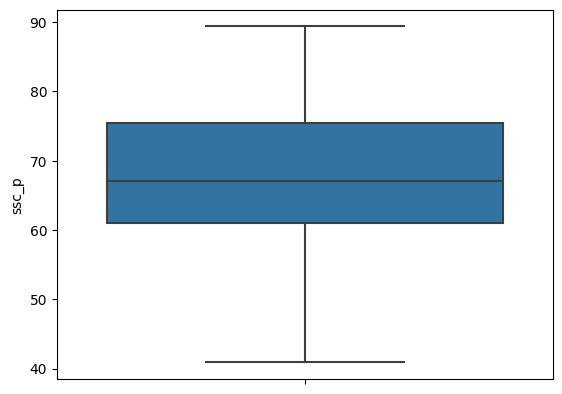

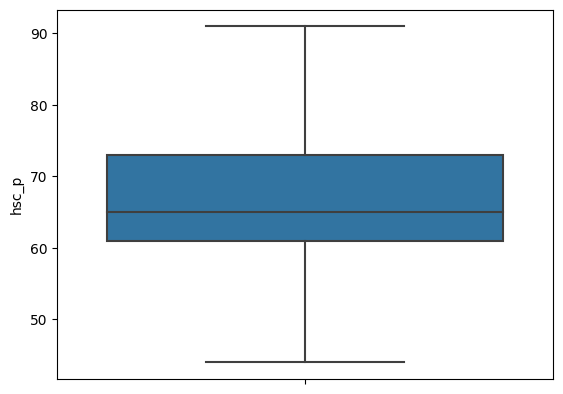

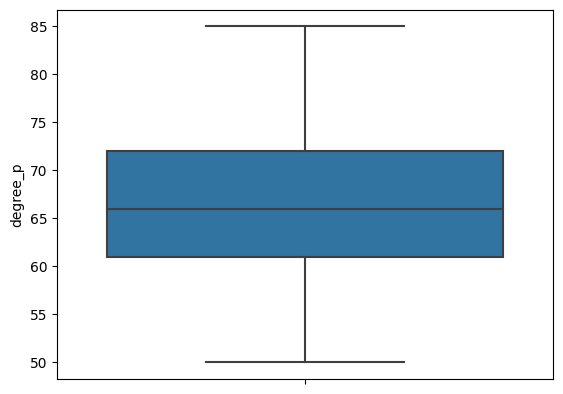

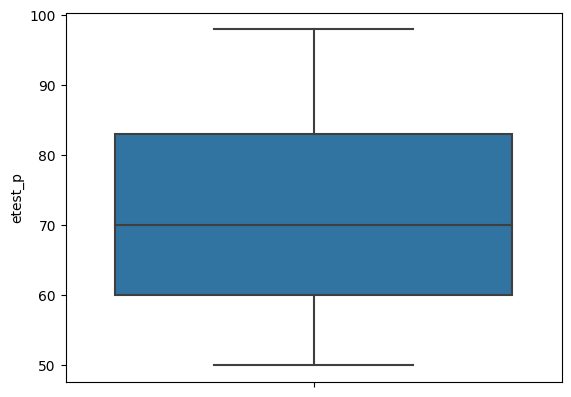

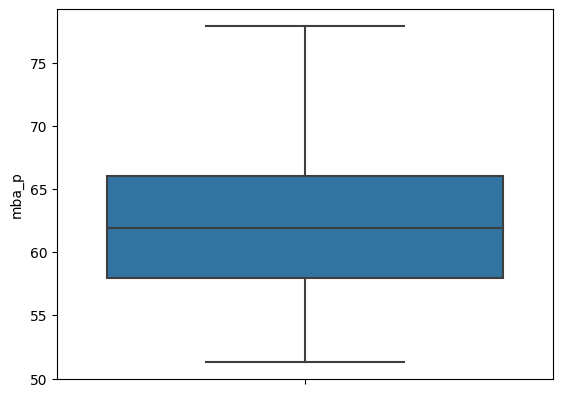

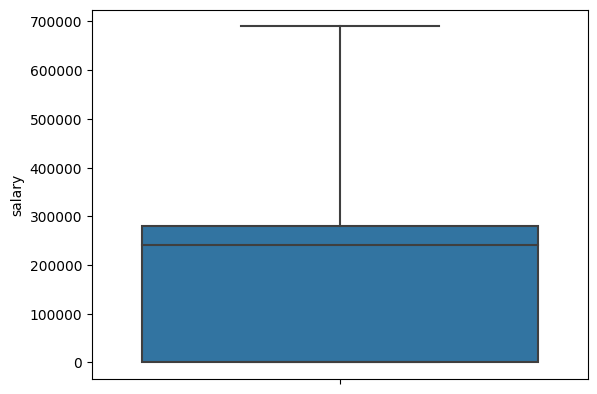

In [49]:
for i in numeric_columns:
    plt.figure()
    sns.boxplot(y=i, data=data)

In [50]:
#percentile25=df['degree_p'].quantile(0.25)

In [51]:
#percentile25

In [52]:
#percentile75=df['degree_p'].quantile(0.75)

In [53]:
#iqr=percentile75-percentile25

In [54]:
#iqr

In [55]:
#percentile75

In [56]:
#upper_limit=percentile75+(1.5*iqr)
#lower_limit=percentile25-(1.5*iqr)

In [57]:
#upper_limit

In [58]:
#lower_limit

In [59]:
#df=df[(df['degree_p']<upper_limit) & (df['degree_p']>lower_limit)]

In [60]:
#sns.boxplot(y='degree_p', data=df)

In [61]:
#df.columns

In [62]:
# col=['ssc_p','hsc_p','etest_p','mba_p','salary']
# for c in col:
#   percentile25=df[c].quantile(0.25)
#   percentile75=df[c].quantile(0.75)
#   iqr=percentile75-percentile25
#   upper_limit=percentile75+(1.5*iqr)
#   lower_limit=percentile25-(1.5*iqr)
#   df=df[(df[c]<upper_limit) & (df[c]>lower_limit)]
#   plt.figure()
#   sns.boxplot(y=c, data=df)

# Label Encoding

In [63]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [64]:
le_categorical_columns=[]
onehot_categorical_columns=[]
for i in categorical_columns:
    if df[i].nunique()==2:
        le_categorical_columns.append(i)
    else:
        onehot_categorical_columns.append(i)
        

In [65]:
for i in categorical_columns:
    print(f"{i}:{df[i].nunique()}")
    
    

gender:2
ssc_b:2
hsc_b:2
hsc_s:3
degree_t:3
workex:2
specialisation:2
status:2


In [66]:
le_categorical_columns

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']

In [67]:
onehot_categorical_columns

['hsc_s', 'degree_t']

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
data[le_categorical_columns]

,gender,ssc_b,hsc_b,workex,specialisation,status
0,M,Others,Others,No,Mkt&HR,Placed
1,M,Central,Others,Yes,Mkt&Fin,Placed
2,M,Central,Central,No,Mkt&Fin,Placed
3,M,Central,Central,No,Mkt&HR,Not Placed
4,M,Central,Central,No,Mkt&Fin,Placed
...,...,...,...,...,...,...
210,M,Others,Others,No,Mkt&Fin,Placed
211,M,Others,Others,No,Mkt&Fin,Placed
212,M,Others,Others,Yes,Mkt&Fin,Placed
213,F,Others,Others,No,Mkt&HR,Placed


In [71]:
for c in le_categorical_columns:
  data[c]=le.fit_transform(data[c])

In [72]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,Commerce,58.00,Comm&Mgmt,0,70.0,1,60.23,1,204000.0


In [73]:
onehot_categorical_columns

['hsc_s', 'degree_t']

In [74]:
data=pd.get_dummies(data,onehot_categorical_columns)

In [75]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0


# Extract the independent and dependent variables

In [76]:
X=data.drop('salary',axis=1)

In [77]:
Y=data['salary']

# Split the dataset into training and testing

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

# Use standardization for feature scaling

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
X_train=sc.fit_transform(X_train)

In [83]:
X_test=sc.transform(X_test)

# Perform Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
reg=LinearRegression()

In [86]:
reg.fit(X_train, Y_train)

LinearRegression()

# Getting Train Data Accuracy

In [87]:
reg.score(X_train,Y_train)

0.8546664077888901

# Getting Test Data Accuracy

In [88]:
reg.score(X_test,Y_test)

0.8329876755229679

In [89]:
reg.intercept_

188664.3356643357

In [90]:
reg.coef_

array([ 11429.96031834,   -725.85987803,   4739.59665697,  -4995.02481755,
        -6296.04767782,  -6853.52858653,   -437.93410676,   5216.90619418,
        -4744.88537661,   9878.9360216 , 135818.62921836,  -4064.39406745,
          823.26277659,    937.48034052,  -8197.8663111 ,   -205.64726293,
         8499.32689757])

In [91]:
Y_pred=reg.predict(X_test)

In [92]:
Y_pred.shape

(62,)

In [93]:
Y_test

1      200000.0
85     400000.0
79          0.0
105         0.0
74     336000.0
         ...   
152    240000.0
115    216000.0
30     250000.0
164    250000.0
25          0.0
Name: salary, Length: 62, dtype: float64

# Evaluate the model using MSE, RMSE and R square

In [94]:
from sklearn import metrics

In [95]:
MSE=metrics.mean_squared_error(Y_test, Y_pred)

In [96]:
RMSE=np.sqrt(MSE)

In [97]:
RMSE

51940.66950824168

In [98]:
R2=metrics.r2_score(Y_test,Y_pred)

In [99]:
R2

0.8329876755229679

In [100]:
from sklearn import metrics

In [101]:
mean_squared_error=metrics.mean_squared_error(Y_test,Y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(X_train,Y_train),3))
print('R sqaured testing',round(reg.score(X_test,Y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

Sqaured mean error 51940.67
R squared training 0.855
R sqaured testing 0.833
intercept 188664.3356643357
coefficient [ 11429.96031834   -725.85987803   4739.59665697  -4995.02481755
  -6296.04767782  -6853.52858653   -437.93410676   5216.90619418
  -4744.88537661   9878.9360216  135818.62921836  -4064.39406745
    823.26277659    937.48034052  -8197.8663111    -205.64726293
   8499.32689757]


# **Logistic Regression**

In [102]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,1,0,0


**Extract the independent and dependent(Status) variables**

In [103]:
X=data.drop(['status','salary'], axis=1).values

In [104]:
X

array([[ 1.  , 67.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 79.33,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [105]:
Y=data['status'].values

In [106]:
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0])

**Split the dataset into training and testing dataset**

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Use standardization**

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Build the Logistic Regression model**

In [109]:
Y_train

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [110]:
Y_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
classifier=LogisticRegression()

In [113]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [114]:
Y_pred=classifier.predict(X_test)

In [115]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

**Create the confusion matrix and draw a heatmap for it**

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 8,  6],
       [ 2, 25]], dtype=int64)

In [117]:
tn,fp,fn,tp=confusion_matrix(Y_test, Y_pred).ravel()

<AxesSubplot:>

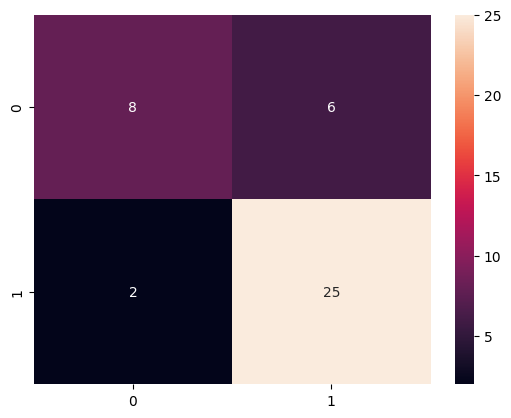

In [118]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

**Find out the train accuracy**

**Find out the accuracy**

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8048780487804879

**Find out the auc roc score**

In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.7486772486772486

**Find out number of 0 classes in Y_test**

In [121]:
sum(Y_test==0)

14

**Find out number of 0 classes in Y_test**

In [122]:
sum(Y_test==1)

27

**Find out the recall and precision**

In [123]:
r=tp/(tp+fn)

In [124]:
p=(tp/(tp+fp))

In [125]:
r

0.9259259259259259

In [126]:
p

0.8064516129032258

**Create the classification report and understand each term in it**

In [127]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.81      0.93      0.86        27

    accuracy                           0.80        41
   macro avg       0.80      0.75      0.76        41
weighted avg       0.80      0.80      0.80        41



In [128]:
f1_score=(2*p*r)/(p+r)

In [129]:
f1_score

0.8620689655172414

In [130]:
p_forClass0=(tn/(tn+fn))

In [131]:
p_forClass0

0.8

In [132]:
r_forClass0=tn/(tn+fp)

In [133]:
r_forClass0

0.5714285714285714

In [134]:
f1_score_for_class0=(2*(p_forClass0)*(r_forClass0))/(r_forClass0+p_forClass0)

In [135]:
f1_score_for_class0

0.6666666666666666

In [136]:
classifier.predict_proba(X_test)

array([[5.48486648e-02, 9.45151335e-01],
       [9.25449255e-02, 9.07455074e-01],
       [1.11976441e-02, 9.88802356e-01],
       [4.89742195e-02, 9.51025781e-01],
       [2.14092229e-02, 9.78590777e-01],
       [4.44141751e-02, 9.55585825e-01],
       [3.71851387e-01, 6.28148613e-01],
       [9.79284274e-01, 2.07157262e-02],
       [9.18663320e-01, 8.13366800e-02],
       [2.96237928e-01, 7.03762072e-01],
       [3.48321870e-02, 9.65167813e-01],
       [3.84727375e-04, 9.99615273e-01],
       [5.78713735e-01, 4.21286265e-01],
       [3.11358151e-02, 9.68864185e-01],
       [2.04405491e-02, 9.79559451e-01],
       [2.67147743e-01, 7.32852257e-01],
       [6.41112788e-01, 3.58887212e-01],
       [7.24621516e-04, 9.99275378e-01],
       [3.06045283e-03, 9.96939547e-01],
       [9.14545675e-01, 8.54543251e-02],
       [2.07043101e-01, 7.92956899e-01],
       [1.59377528e-02, 9.84062247e-01],
       [9.93993301e-02, 9.00600670e-01],
       [6.84684531e-01, 3.15315469e-01],
       [3.189937

# **Change the Throseld of logistic regression**

In [137]:
Y_pred=(classifier.predict_proba(X_test)[:,1]>=0.7).astype(int)

In [138]:
Y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])